In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import csv
import rasterio
import rioxarray

In [4]:
# Open maps

# Load rasters, convert to dataframe and merge per zone
# UAV
# May
UAV_MAY_NEE = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20230517_CUTFINAL_Mask_NEE.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('May').to_dataframe().reset_index().drop(columns=["y", "x"])
UAV_MAY_ER = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20230517_CUTFINAL_Mask_ER.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('May').to_dataframe().reset_index().drop(columns=["y", "x"])
UAV_MAY_GEP = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20230517_CUTFINAL_Mask_GEP.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('May').to_dataframe().reset_index().drop(columns=["y", "x"])
# June
UAV_JUNE_NEE = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20230615_CUTFINAL_Mask_NEE.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('June').to_dataframe().reset_index().drop(columns=["y", "x"])
UAV_JUNE_ER = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20230615_CUTFINAL_Mask_ER.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('June').to_dataframe().reset_index().drop(columns=["y", "x"])
UAV_JUNE_GEP = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20230615_CUTFINAL_Mask_GEP.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('June').to_dataframe().reset_index().drop(columns=["y", "x"])
# July
UAV_JULY_NEE = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/Bernadouze_20230710_CUTFINAL_Mask_NEE.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('July').to_dataframe().reset_index().drop(columns=["y", "x"])
UAV_JULY_ER = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository//Bernadouze_20230710_CUTFINAL_Mask_ER.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('July').to_dataframe().reset_index().drop(columns=["y", "x"])
UAV_JULY_GEP = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/Bernadouze_20230710_CUTFINAL_Mask_GEP.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('July').to_dataframe().reset_index().drop(columns=["y", "x"])
# October
UAV_OCTOBER_NEE = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20231005_CUTFINAL_Mask_NEE.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('October').to_dataframe().reset_index().drop(columns=["y", "x"])
UAV_OCTOBER_ER = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20231005_CUTFINAL_Mask_ER.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('October').to_dataframe().reset_index().drop(columns=["y", "x"])
UAV_OCTOBER_GEP = rioxarray.open_rasterio('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/BERNADOUZE_20231005_CUTFINAL_Mask_GEP.tif',masked=True).squeeze().drop("spatial_ref").drop("band").rename('October').to_dataframe().reset_index().drop(columns=["y", "x"])

# Merge and scale
UAV_NEE = pd.concat([UAV_MAY_NEE,UAV_JUNE_NEE,UAV_JULY_NEE,UAV_OCTOBER_NEE], axis=1).dropna()*0.0025
UAV_ER = pd.concat([UAV_MAY_ER,UAV_JUNE_ER,UAV_JULY_ER,UAV_OCTOBER_ER], axis=1).dropna()*0.0025
UAV_GEP = pd.concat([UAV_MAY_GEP,UAV_JUNE_GEP,UAV_JULY_GEP,UAV_OCTOBER_GEP], axis=1).dropna()*0.0025

# Sum in kgC/day
UAV_NEE_Sum = ((UAV_NEE.sum(axis=0)/1000)*10)*0.2727
UAV_ER_Sum = ((UAV_ER.sum(axis=0)/1000)*10)*0.2727
UAV_GEP_Sum = ((UAV_GEP.sum(axis=0)/1000)*10)*0.2727

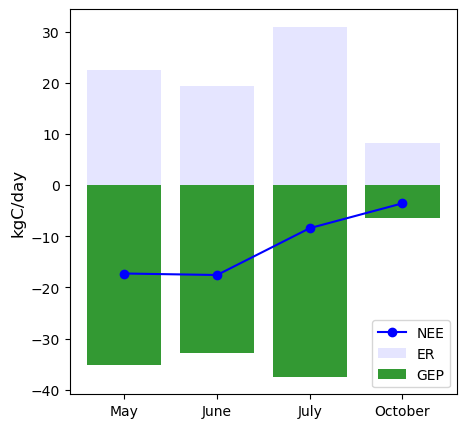

In [5]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax1.plot(UAV_NEE_Sum,'o-b',label='NEE')
ax1.bar(['May','June','July','October'],UAV_ER_Sum,color='b',alpha=0.1,label='ER')
ax1.bar(['May','June','July','October'],UAV_GEP_Sum,color='g',alpha=0.8,label='GEP')
ax1.set_ylabel("kgC/day", fontweight='normal', fontsize=12)
ax1.legend(loc='lower right')

plt.savefig("F:/Redaction/Bernadouze/Submitted/R2/Figure10.tif", dpi = 600)